In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Parameter values


In [23]:
N = 500000  #Total population

Lambda = 14 / 1000 / 365  # Births Per day
mu     = 8 / 1000 / 365  # Natural death rate per day
delta  =  1 / 1000 / 365    # TB death rate per day

#Control Inputs

In [24]:
alpha = 1 / 365   #Vaccination rate ~ 1% of S per day
tau   = 1 / 90    # treatment rate per day

#Model Parameters


In [25]:
beta =  0.070   # Transmission rate (every Infectious person infects 2 others on average)
sigma =  0.50   # Vaccination Inefficiency (50% effective)
gamma = 1 / 180 # Treatment completion (6 months treatment)
eps = 1 / 365   # Latency progression rate
phi = 0.03      # Exogenous reinfection rate (i.e R faces 43% infection risk)
rho = 0.21 * (1 / 180) # treatment failure (21% Failure)

#TB MODEL / ODE SYSTEM

In [26]:
def sveirt(t, x):
    S, V, E, I, T, R = x
    lam = beta * I / N
    dS = Lambda - lam*S     - alpha*S - mu*S
    dV = alpha*S - sigma*lam*V        - mu*V
    dE = lam*S + sigma*lam*V + (phi*R*I) / N - (eps + mu)*E
    dI = eps*E + rho*T      - (tau + mu + delta)*I
    dT = tau*I              - (gamma + rho + mu)*T
    dR = gamma*T            - mu*R - (phi*R*I) / N
    return [dS, dV, dE, dI, dT, dR]

#Initial conditions

In [27]:
I0  = 0.0015
V0  = 0.10
E0  = 0.005
T0  = 0.0009
R0  = 0.0933
S0  = 1.0 - V0 - E0 - I0 - T0 - R0

#SOlve ODE

In [28]:
t = 365
t_eval = np.linspace(0, t, 1000)

In [29]:
x0     = [S0, V0, E0, I0, T0, R0]

In [30]:
sol = solve_ivp(
    sveirt,
    (0, t),
    x0,
    t_eval=t_eval,
    method='RK45',
    rtol=1e-8,
    atol=1e-10)

t            = sol.t
S, V, E, I, T, R = sol.y

#plot

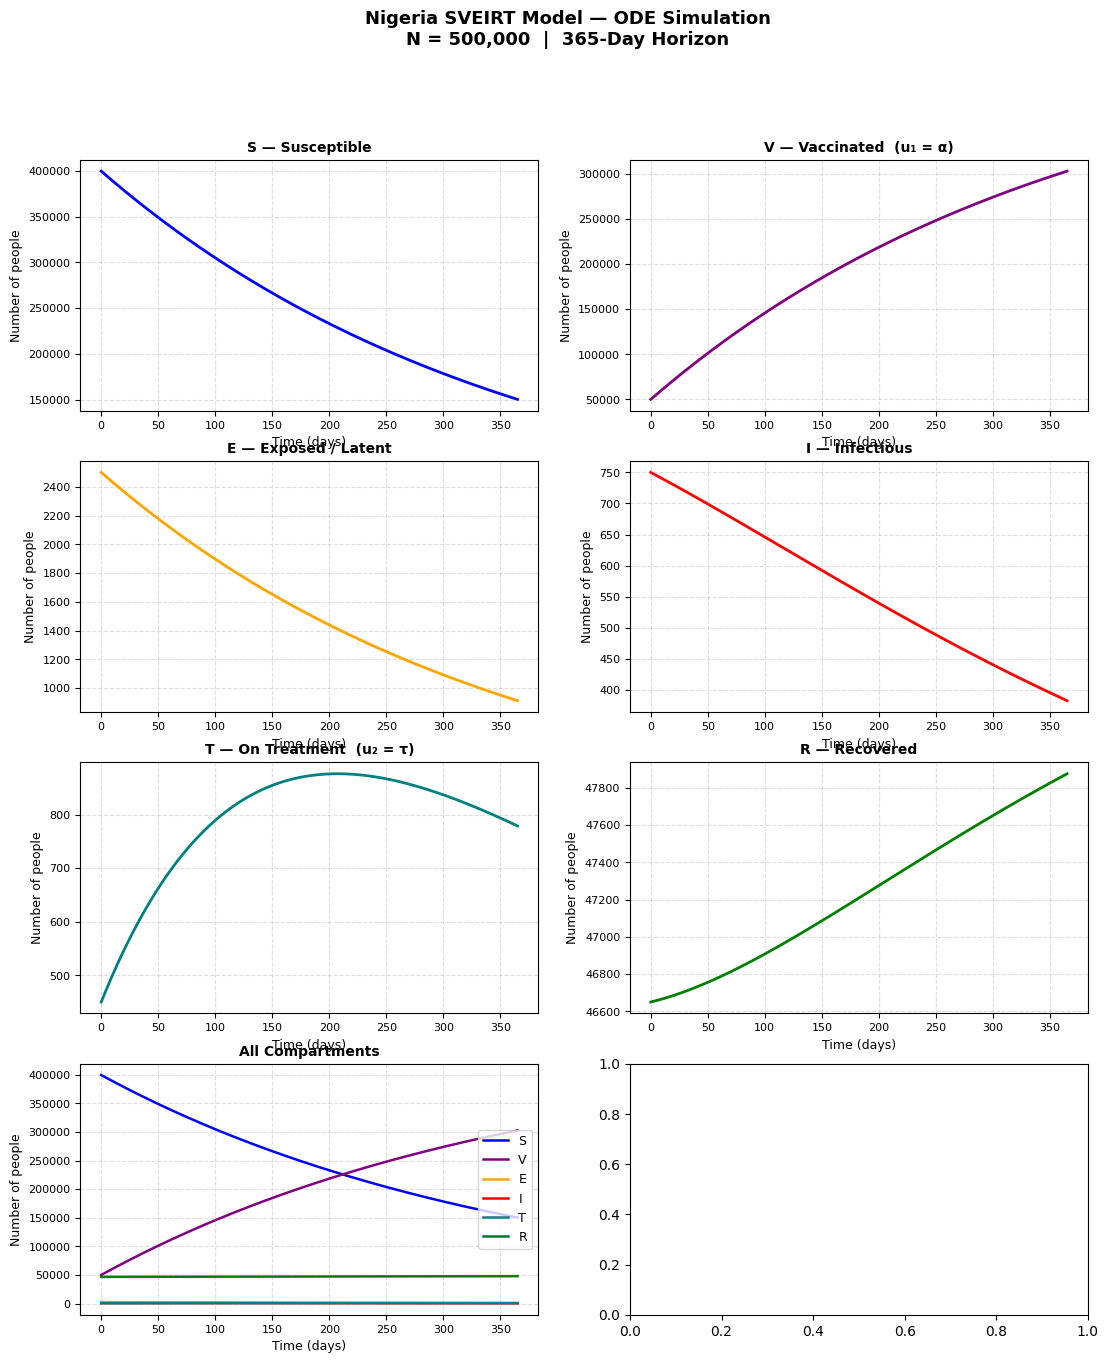

In [32]:
fig, axes = plt.subplots(4, 2, figsize=(13, 15))
fig.suptitle(
    "Nigeria SVEIRT Model — ODE Simulation\n"
    "N = 500,000  |  365-Day Horizon",
    fontsize=13, fontweight='bold'
)

plots = [
    (axes[0][0], S, 'S — Susceptible',           'blue'),
    (axes[0][1], V, 'V — Vaccinated  (u₁ = α)',  'purple'),
    (axes[1][0], E, 'E — Exposed / Latent',       'orange'),
    (axes[1][1], I, 'I — Infectious',             'red'),
    (axes[2][0], T, 'T — On Treatment  (u₂ = τ)', 'teal'),
    (axes[2][1], R, 'R — Recovered',              'green'),
]

for ax, y, title, color in plots:
    ax.plot(t, y * N, color=color, linewidth=2)
    ax.set_title(title, fontsize=10, fontweight='bold')
    ax.set_xlabel("Time (days)", fontsize=9)
    ax.set_ylabel("Number of people", fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.tick_params(labelsize=8)

# All compartments together
ax_all = axes[3][0]
for y, label, color in [(S,'S','blue'),(V,'V','purple'),(E,'E','orange'),
                         (I,'I','red'),(T,'T','teal'),(R,'R','green')]:
    ax_all.plot(t, y * N, label=label, color=color, linewidth=1.8)
ax_all.set_title("All Compartments", fontsize=10, fontweight='bold')
ax_all.set_xlabel("Time (days)", fontsize=9)
ax_all.set_ylabel("Number of people", fontsize=9)
ax_all.legend(fontsize=9, loc='center right')
ax_all.grid(True, linestyle='--', alpha=0.4)
ax_all.tick_params(labelsize=8)
